In [1]:
import numpy as np
import os
import h5py
from  FluxPy.PDE import curl
from matplotlib.animation import FuncAnimation, PillowWriter  
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def read_files(run_path, num_files=None):
    u_list, v_list, p_list = [], [], []
    try:
        files = os.listdir(run_path)
    except FileNotFoundError as e:
        print(e, 'is not a valid run directory')
        return None
    if num_files is None: num_files = sum('data_' in file for file in files)
    for i in range(num_files):
        with h5py.File(f'{run_path}/data_{2*i}.h5', 'r') as file:
            u_dataset, v_dataset, p_dataset = file['u'], file['v'], file['p']
            u_list.extend(list(u_dataset))
            v_list.extend(list(v_dataset))
            p_list.extend(list(p_dataset))
    return {'u':np.array(u_list), 'v':np.array(v_list), 'p':np.array(p_list)}


In [43]:
dx = 12/200
dy = 4/200

def animate(run_path:str, var:str):
    data = read_files(run_path)
    if data is None:
        return 
    if var in ['u', 'v', 'p']:
        field = data[var]
    elif var == 'curl':
        u_array, v_array = data['u'], data['v']
        field = np.abs(np.array([curl(u_array[i], v_array[i], dx, dy) for i in range(u_array.shape[0])]))
    else:
        return
    
    return field
        
animate("figs/run4")

13


0.0 85.05185301602496


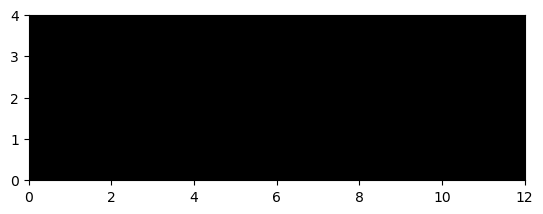

In [11]:
Lx = 12
Ly = 4
dx = Lx/200
dy = Ly/200
data = read_files("figs/run4/data")
u_array, v_array, p_array = data['u'], data['v'], data['p']
x = np.linspace(0, Lx, u_array[0].shape[0])
y = np.linspace(0, Ly, u_array[0].shape[1])
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots()
mag = np.sqrt(u_array**2 + v_array**2)
curls = np.abs(np.array([curl(u_array[i], v_array[i], dx, dy) for i in range(u_array.shape[0])]))

levels = np.linspace(np.min(curls), np.max(curls), 1000)
contour = ax.contourf(X, Y, curls[0], levels=levels, cmap='bone')
#ax.set_xlim(0, 4)
#ax.set_ylim(1, 3)
ax.set_aspect('equal')
print(np.min(curls), np.max(curls))

In [6]:
field = curls


def init():
    global contour
    contour = ax.contourf(X, Y, field[0], levels=levels, cmap='bone')
    return contour.collections

def animate(i):
    global contour
    for c in contour.collections:
        c.remove()  # Remove previous contour collections
    contour = ax.contourf(X, Y, field[i], levels=levels, cmap='bone')
    #fig.canvas.draw()
    return contour.collections

anim = FuncAnimation(fig, animate, init_func=init, frames=len(field), blit=False)

In [7]:
iter = 5
anim.save(f'karman_street.gif', writer='pillow', fps=30)

In [ ]:
for curls in field:
    fig, ax = plt.subplots()
    contour = ax.contourf(X, Y, field[0], levels=levels, cmap='jet')
    plt.colorbar(contour)
    plt.show()